#  Data Challenge

* **Name:** Nupur Rathi
* **Email:** nupur27rathi@gmail.com

## Overview

### Problem Statement

A real estate company that has a niche in purchasing properties to rent out short-term as part of their business model specifically within New York City is requiring consulting for the problem. The real estate company has already concluded that two bedroom properties are the most profitable; however, they do not know which zip codes are the best to invest in.

The real estate company requires a data product to help them understand which zip codes would generate the most profit on short term rentals within New York City.

### Data

We are provided with Airbnb and Zillow datasets for this Challenge.

Link: https://github.com/CapitalOneRecruiting/DA

- **Airbnb**          
This dataset is stored in 4 CSV documents. We will combine these to form a single Airbnb dataset. It provides information about different airbnb listings. Key variables of this dataset that will be used in analysis:
        - zipcode: Zip code where the property is located
        - city: City where the property is located
        - state: State where the property is located
        - neighbourhood_group_cleansed: Neighbourhood where the property is located.
        - price: Price the host is charging to stay per night
        - bedrooms: Indicates the number of bedrooms within the property
        
- **Zillow**        
This dataset is stored in a single CSV document. It contains information about the median house prices of two-bedroom properties between the April 1996 and June 2017 computed every month.This data is available for different zip codes in the United States.Key variables of this dataset that will be used in analysis:
        - RegionName: Zip code of where the property is located
        - City: City of where the property is located
        - State: State of where the property is located
        - 1996-04 to 2017-06: Indicates the historical median price within that area.


### Assumptions
- The investor will pay for the property in cash (i.e. no mortgage/interest rate will need to be accounted for).
- The time value of money discount rate is 0% (i.e. $1 today is worth the same 100 years from now).
- All properties and all square feet within each locale can be assumed to be homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or Manhattan generates twice the revenue and costs twice as much as any other 500 square foot property within that same locale.)
- The company will put properties on rent throughout the year every day and out of which 75% of the year they will be rented since the occupancy rate is assumed to be 75%

## 1. Importing Required Packages

In [1]:
try:
    import pandas as pd                                               # Package for data manipulation
    import matplotlib.pyplot as plt                                   # Package for data visualization
    import seaborn as sns                                             # Package for data visualization
    import numpy as np                                                # Package for performing numerical operations                 
    import warnings                                                   # Package to Control code warnings
    from uszipcode import SearchEngine, SimpleZipcode, Zipcode        # Package to fetch US zipcodes, latitude and longitude
except:
    print("Please install the missing packages: Syntax: !pip install <packagename> \ne.g. pip install uszipcode")

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## 2. Loading and Merging Data

In [2]:
# DataSources

#Airbnb  
list_path1 = "../input/listings file 1 of 4.csv"
list_path2 = "../input/listings file 2 of 4.csv"
list_path3 = "../input/listings file 3 of 4.csv"
list_path4 = "../input/listings file 4 of 4.csv"

#Zillow
zillow_path = "../input/Zip_Zhvi_2bedroom.csv"

# Load Airbnb data 
listings1=pd.read_csv(list_path1, low_memory=False)         #Only the first CSV contain headers
column_headers = list(listings1.columns)
listings2=pd.read_csv(list_path2, low_memory=False, header = None, names = column_headers)
listings3=pd.read_csv(list_path3, low_memory=False, header = None, names = column_headers)
listings4=pd.read_csv(list_path4, low_memory=False, header = None, names = column_headers)
# Merge Airbnb data
all_listings = listings1.append(listings2)
all_listings = all_listings.append(listings3)
all_listings = all_listings.append(listings4)

#load Zillow data
zillow = pd.read_csv(zillow_path, low_memory=False)

In [3]:
all_listings.shape

(40753, 95)

## 3. Data Preview

Before diving deep into the data, we begin by having a glimpse of the data

#### Airbnb Data
The airbnb dataset contains 40753 observations and 95 variables.

In [4]:
all_listings.shape

(40753, 95)

In [5]:
all_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7949480,https://www.airbnb.com/rooms/7949480,2.020000e+13,5/3/17,City Island Sanctuary relaxing BR & Bath w Par...,Come relax on City Island in our quiet guest r...,"On parle fran√ßais et anglais, (lire Fran√ßais...",Come relax on City Island in our quiet guest r...,none,City Island is a unique sanctuary in New York ...,We are walkable to Pelham Park which is the la...,"On the island, you can walk to everything. A ...",Feel free to enjoy our large backyard in seaso...,We speak fluent French and English. We will b...,No extra guests or visitors who are not in the...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,https://a0.muscache.com/im/pictures/001d1cb0-6...,119445,https://www.airbnb.com/users/show/119445,Linda & Didier,5/6/10,"New York, New York, United States","I am a designer, former instructor at a design...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/2de30fe4-b...,https://a0.muscache.com/im/pictures/2de30fe4-b...,City Island,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.852054,-73.788680,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",NaN,$99.00,NaN,NaN,$100.00,NaN,1,$20.00,1,7,yesterday,NaN,24,54,80,170,5/3/17,25,1/18/16,4/23/17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,moderate,t,t,1,1.59
1,16042478,https://www.airbnb.com/rooms/16042478,2.020000e+13,5/4/17,WATERFRONT STUDIO APARTMENT,My place is close to Sea Shore. You‚Äôll love ...,(URL HIDDEN),My place is close to Sea Shore. You‚Äôll love ...,none,(URL HIDDEN),"Fine sea food restaurant, bars and night clubs...",NaN,"public transport from Grand Central, NYC or fr...",NaN,NaN,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,https://a0.muscache.com/im/pictures/bb5bc3c4-3...,9117975,https://www.airbnb.com/users/show/9117975,Collins,9/29/13,"New York, New York, United States",I am married with 3 children and 2 grandkid. ...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/9117975/profi...,https://a0.muscache.com/im/users/9117975/profi...,City Island,1.0,1.0,"['phone', 'facebook']",t,f,"City Island, Bronx, NY 10464, United States",City Island,City Island,Bronx,Bronx,NY,10464,New York,"Bronx, NY",US,United States,40.853491,-73.788607,t,Apartment,Private r

#### Zillow Data
The zillow dataset contains 8946 observations and 262 variables.

In [6]:
zillow.shape

(8946, 262)

In [7]:
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61627,10013,New York,NY,New York,New York,1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1428000.0,1444100.0,1458700.0,1502700.0,1570100.0,1638000.0,1687000.0,1718300.0,1747600.0,1753300.0,1706600.0,1660500.0,1650500.0,1642200.0,1625600.0,1618600.0,1618900.0,1622200.0,1623500.0,1639500.0,1678900.0,1705500.0,1702200.0,1701700.0,1730800.0,1773400.0,1839600.0,1903600.0,1935000.0,1946100.0,1974100.0,1987800.0,1993400.0,1990200.0,1970600.0,1953100.0,1979000.0,2032800.0,2070000.0,2090200.0,2121100.0,2167300.0,2200000.0,2226600.0,2259300.0,2285700.0,2289000.0,2288500.0,2285800.0,2281300.0,2278800.0,2295100.0,2324500.0,2328500.0,2333000.0,2366700.0,2376200.0,2377400.0,2405100.0,2433000.0,2406100.0,2350800.0,2289500.0,2257800.0,2243500.0,2241000.0,2233600.0,2219900.0,2198000.0,2209300.0,2268700.0,2294100.0,2273600.0,2261700.0,2282800.0,2288000.0,2275700.0,2281300.0,2302800.0,2290900.0,2267800.0,2253600.0,2245300.0,2264200.0,2301000.0,2328600.0,2337000.0,2341500.0,2335200.0,2316700.0,2299900.0,2318700.0,2396400.0,2479200.0,2490300.0,2466000.0,2492400.0,2542800.0,2585500.0,2618100.0,2651700.0,2670800.0,2670000.0,2665400.0,2677400.0,2687000.0,2686200.0,2687700.0,2694200.0,2708600.0,2722800.0,2727900.0,2751300.0,2794600,2845700,2899700,2928600,2914100,2915200,2945600,2973800,2988900,3018400,3063600,3075900,3063800,3077400,3108800,3123300,3106400,3067600,3047400,3054500,3071700,3078300,3073100,3089400,3121700,3134200,3152400,3173600,3195000,3234600,3302400.0,3335800.0,3324200.0,3285100.0,3274100,3298600,3341100,3347100,3305500,3261100,3244000.0,32314

## 4. Data Cleaning

### Data Cleaning Function Repository

In [8]:
#Function to Compute missing values
def computeMissing(df):
    return df.isnull().sum()

#Function to Compute missing Values Percentage
def computeMissingPercent(df):
    percent_missing = (computeMissing(df)* 100 / len(df))
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing}).reset_index()
    missing_value_df = missing_value_df.drop('index',axis=1)
    missing_value_df['percent_missing'] = round(missing_value_df['percent_missing'],2)
    missing_value_df = missing_value_df.sort_values(by=['percent_missing'], ascending=False)
    return missing_value_df

#Function to Plot missing Values Percentages
def plotMissingPercentWithValues(df,length,height):
    missing_value_df = computeMissingPercent(df)
    plt.figure(figsize= (length,height))
    sns.barplot(x="percent_missing", y="column_name", data=missing_value_df, color="steelblue")
    plt.xticks(size=12)
    plt.xlabel('Missing Percentage', size=12)
    plt.yticks(size=12)
    plt.ylabel('Column Names',size=12)
    plt.title('Missing Value Percentage by Column Name')
    for index, value in enumerate(round(missing_value_df['percent_missing'],2)):
        plt.text(value, index, str(value))

#Function to check and remove duplicates
def checkAndRemoveDuplicates(df):
    duplicate_row_count = len(df[df.duplicated()])
    if duplicate_row_count == 0:
        return "No duplicates"
    else:
        df.drop_duplicates(keep=False,inplace=True) 
        return ("Dropped duplicates: " + str(duplicate_row_count))

#Function to fill missing zipcodes using latitude and longitude
def fill_zipcode_using_lat_long(df):
    miss_zipcodes = []
    se = SearchEngine()
    lat_long_for_miss_zips =df.loc[df.zipcode.isnull(),['latitude','longitude']]
    row_count = lat_long_for_miss_zips.shape[0]
    for i in range(row_count):
        lat = lat_long_for_miss_zips.latitude.iloc[i]
        long = lat_long_for_miss_zips.longitude.iloc[i]
        result = se.query(lat=lat, lng=long,radius=2,returns=1)
        if result is None:
            miss_zipcodes.append('') 
        else:
            for r in result:
                miss_zipcodes.append(r.zipcode)

    df.loc[df.zipcode.isnull(),'zipcode'] = miss_zipcodes
    df['zipcode'] = df['zipcode'].map(lambda x : str(x)[:5])
    return df

#Function to convert price in USD notation to numeric
def convert_usd_notation_to_numeric(df, column_list):
    df[column_list] = df[column_list].replace('[\$,]','',regex=True)
    df[column_list] = df[column_list].astype(float)
    return df

#Function to convert variable type into category
def convert_datatype_to_category(df, column_list):
    for i in column_list:
        df[i]=df[i].astype('category')
    return df

### Airbnb : Data Cleaning

**Selecting Relevant Data**             
There are 95 variables present in the listings dataframe, out of which 13 variables are selected keeping the problem statement in mind.

*Note:
Variables are selected keeping the fact that the analysis is required at zipcode level. If the problem statement required analysis at property level, then additional variables would have been considered.*

Herein we have filtered the columns but not the rows as complete data is required for imputing missing values. For missing data imputation, the larger the dataset the better.

In [9]:
required_cols = ["id","neighbourhood_group_cleansed","city","state","smart_location","zipcode","latitude","longitude","bedrooms","square_feet","price", "weekly_price","monthly_price"]
listings_copy = all_listings.copy()
listings = listings_copy[required_cols]
listings.shape

(40753, 13)

#### Check for duplicates
Lets have a look at the duplicates present in the data.

In [10]:
#View duplicate records
duplicate_df = listings[listings.duplicated()]
duplicate_df.head()

,id,neighbourhood_group_cleansed,city,state,smart_location,zipcode,latitude,longitude,bedrooms,square_feet,price,weekly_price,monthly_price


In [11]:
#Remove duplicates
checkAndRemoveDuplicates(listings)

'No duplicates'

The airbnb dataset does not contain any duplicate records.

#### Check for missing values
The dataset is checked for null/missing values

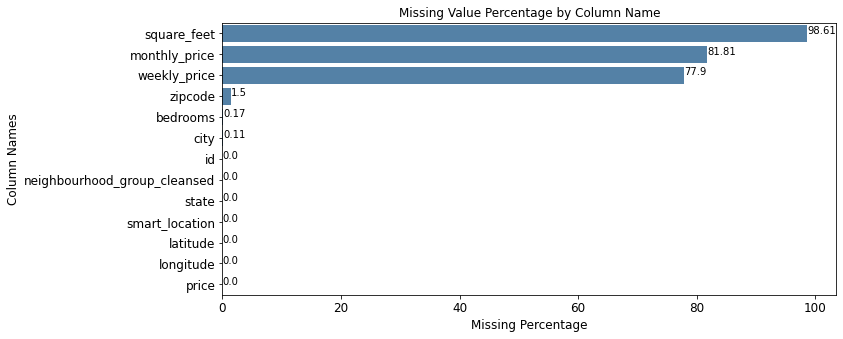

In [12]:
#Plot missing value percentages
plotMissingPercentWithValues(listings,length=11,height=5)

From the Missing Values Percentage plot, it is known that there are no missing values for 'price' while weekly_price,monthly_price,square_feet have more than 75% missing values.Thus, we will only use price for further calculations. This carries on to the assumption that the rent is uniform across all periods ie. the weekly rent will be 7 times the daily rent and so on. But in real business scenarios, rent price for different periods vary, generally a discount is offered as the duration of stay increases.

Since missing value percentage for bedrooms and city is less than 1%, we will drop these missing values.

In [13]:
#Drop the NA values from the bedrooms, city 
listings = listings.dropna(axis = 0, subset = ['bedrooms','city'])
listings.shape

(40641, 13)

Due to a large number of missing values in monthly_price,weekly_price,square_feet, we will drop these columns.Since Longitude and Latitude are best predictors for zip codes we will use them to impute the missing zip codes.

In [14]:
listings = listings.drop(['weekly_price','monthly_price','square_feet'],axis=1)
listings = fill_zipcode_using_lat_long(listings)
computeMissingPercent(listings)

,column_name,percent_missing
0,id,0.0
1,neighbourhood_group_cleansed,0.0
2,city,0.0
3,state,0.0
4,smart_location,0.0
5,zipcode,0.0
6,latitude,0.0
7,longitude,0.0
8,bedrooms,0.0
9,price,0.0


The data is now free from missing values. 

**Data Format Check**        
The next step is to check the data format. Herein datatypes are checked and converted into the correct format. e.g. columns relating to price are using the USD notation which is not useful for analysis, thus they are converted into numeric.

Additionally, bedrooms column is converted into categorical type.

In [15]:
#Since missing zipcodes are completed filled using latitude and longitude data. We can drop these columns
listings = listings.drop(['latitude','longitude'],axis=1)
price_columns_list = ['price']
listings = convert_usd_notation_to_numeric(listings, price_columns_list)
listings = convert_datatype_to_category(listings,['bedrooms'])
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40641 entries, 0 to 10753
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            40641 non-null  int64   
 1   neighbourhood_group_cleansed  40641 non-null  object  
 2   city                          40641 non-null  object  
 3   state                         40641 non-null  object  
 4   smart_location                40641 non-null  object  
 5   zipcode                       40641 non-null  object  
 6   bedrooms                      40641 non-null  category
 7   price                         40641 non-null  float64 
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 2.5+ MB


In [16]:
listings.head()

,id,neighbourhood_group_cleansed,city,state,smart_location,zipcode,bedrooms,price
0,7949480,Bronx,Bronx,NY,"Bronx, NY",10464,1.0,99.0
1,16042478,Bronx,Bronx,NY,"Bronx, NY",10464,1.0,200.0
2,1886820,Bronx,Bronx,NY,"Bronx, NY",10464,3.0,300.0
3,6627449,Bronx,City Island,NY,"City Island, NY",10464,1.0,125.0
4,5557381,Bronx,Bronx,NY,"Bronx, NY",10464,1.0,69.0


Now we will try to understand the  distribution of bedrooms in the dataset as well as price per night distribution.

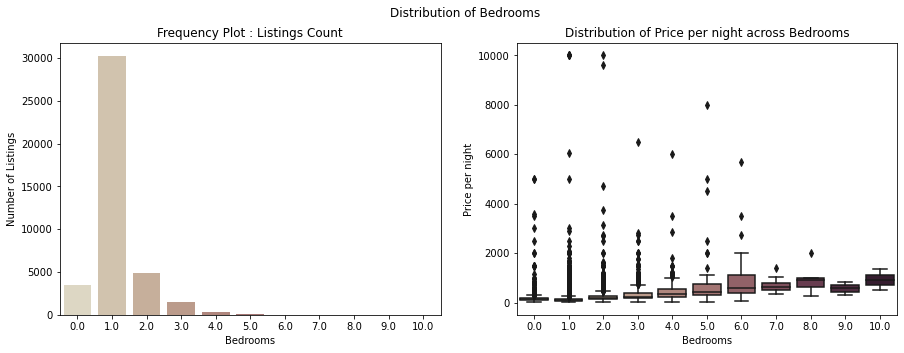

In [17]:
#Distribution of bedrooms
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Distribution of Bedrooms')

sns.countplot(x="bedrooms", palette="ch:.35", data=listings, ax=axes[0])
axes[0].set_title("Frequency Plot : Listings Count")
axes[0].set_xlabel("Bedrooms")
axes[0].set_ylabel("Number of Listings")

sns.boxplot(x="bedrooms", y="price", palette="ch:.35", data=listings, ax=axes[1])
axes[1].set_title("Distribution of Price per night across Bedrooms")
axes[1].set_xlabel("Bedrooms")
axes[1].set_ylabel("Price per night");

The bar plot on the left shows that the majority of listings are having 1 bedroom. 
The box plot distribution on the right shows that the price distribution is skewed for almost all bedrooms and reaching upto $10,000 per night.

#### Filtering the data

The real estate company has already concluded that two bedroom properties are the most profitable therefore we will filter the data for two bedroom properties in New York city.

In [18]:
listings_2br_ny = listings[(listings['city'] == 'New York') & (listings['bedrooms']==2)]
listings_2br_ny.shape

(2349, 8)

Post data filtering we can clearly see that there are 2349 Airbnb listings of 2 Bedrooms in New York city.  

In [19]:
listings_2br_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 33 to 10752
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            2349 non-null   int64   
 1   neighbourhood_group_cleansed  2349 non-null   object  
 2   city                          2349 non-null   object  
 3   state                         2349 non-null   object  
 4   smart_location                2349 non-null   object  
 5   zipcode                       2349 non-null   object  
 6   bedrooms                      2349 non-null   category
 7   price                         2349 non-null   float64 
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 149.5+ KB


To better understand the distribution of listings across New York City, we will examine the number of listings and price per night by neighbourhood.

In [20]:
listings_2br_ny['neighbourhood_group_cleansed'].value_counts()

Manhattan        2310
Brooklyn           23
Queens             15
Staten Island       1
Name: neighbourhood_group_cleansed, dtype: int64

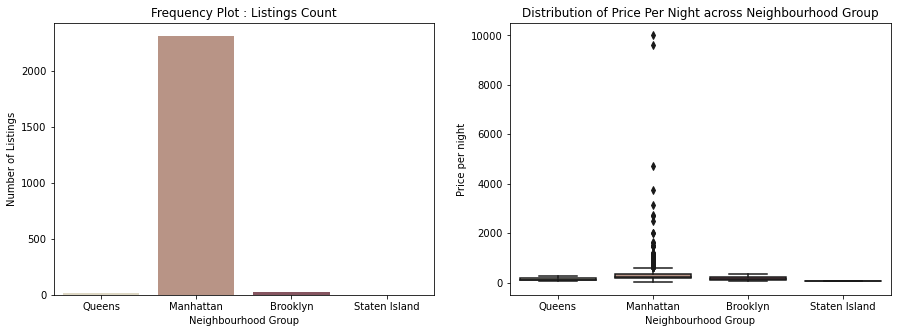

In [21]:
#Distribution by Neighbourhood
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="neighbourhood_group_cleansed", palette="ch:.35", data=listings_2br_ny, ax=axes[0])
axes[0].set_title("Frequency Plot : Listings Count")
axes[0].set_xlabel("Neighbourhood Group")
axes[0].set_ylabel("Number of Listings")

sns.boxplot(x="neighbourhood_group_cleansed", y="price", palette="ch:.35", data=listings_2br_ny, ax=axes[1])
axes[1].set_title("Distribution of Price Per Night across Neighbourhood Group")
axes[1].set_xlabel("Neighbourhood Group")
axes[1].set_ylabel("Price per night");

Left Plot: It shows that the majority of listings are located in Manhattan. Manhattan has 2310 listings while Staten Island only has 1 listing. 

Right Plot: It shows that Price per night is skewed for almost all the neighbourbood groups. Manhattan has some very expensive properties eg. A 2 bedroom property in Manhattan can cost $10,000 per night. 

#### Remove Outliers

Outliers or properties with extreme values in price can be removed after identifying the correct cutoff percentile. We will examine values at different quantiles w.r.t price and identify the cutoff percentile.

In [22]:
listings_2br_ny['price'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95,0.98,1])

0.10     120.0
0.20     150.0
0.30     190.0
0.40     205.0
0.50     250.0
0.60     279.0
0.70     300.0
0.80     375.0
0.90     480.0
0.95     600.0
0.98     900.0
1.00    9999.0
Name: price, dtype: float64

It appears that values above 0.98 percentile (i.e.900 USD) are the outliers and should be removed. Therefore, we will drop the rows wherein price per night is greater than $900.

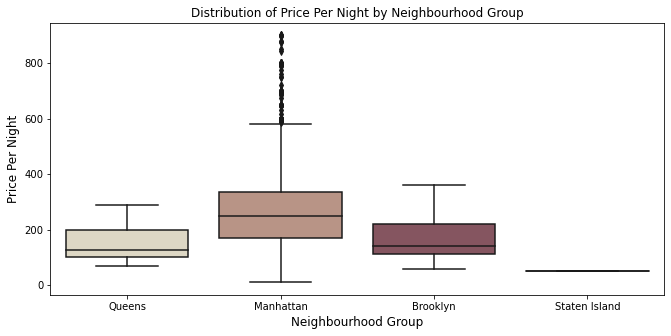

In [23]:
listings_2br_ny = listings_2br_ny[listings_2br_ny['price'] <= 900]
#Distribution of Price per night by Neighbourhood Group
plt.figure(figsize= (11,5))
sns.boxplot(x="neighbourhood_group_cleansed", y="price", palette="ch:.35", data=listings_2br_ny)
plt.title("Distribution of Price Per Night by Neighbourhood Group")
plt.xlabel('Neighbourhood Group', size=12)
plt.ylabel('Price Per Night',size=12);

The box plot distribution is less skewed after the removal of outliers. But still the price variances are high across the neighbourhoods. Such variance will also be observed across different zipcodes. Therefore, to be consistant in our analysis we will be using Median Price for our future calculations.

### Zillow : Data Cleaning

In [24]:
zillow.shape

(8946, 262)

Zillow dataset contains 8946 observations and 262 variables. 

#### Check for duplicates
Lets have a look at the duplicates present in the data.

In [25]:
#View duplicate records
duplicate_df = zillow[zillow.duplicated()]
duplicate_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06


In [26]:
checkAndRemoveDuplicates(zillow)

'No duplicates'

The data does not contain any duplicate records

#### Check for missing values
The dataset is checked for null/missing values

In [27]:
#Compute missing values 
computeMissing(zillow)

RegionID        0
RegionName      0
City            0
State           0
Metro         250
             ... 
2017-02         0
2017-03         0
2017-04         0
2017-05         0
2017-06         0
Length: 262, dtype: int64

We can observe that there are no missing values for house prices in the last 12 months which ranges from '2016-06' to '2017-06'. Time value of money discount rate is assumed 0% (i.e. $1 today is worth the same 100 years from now). 
Keeping these factors in mind, we will just consider the last 12 months data for calculation.

#### Data Transformation

For easier readability, we will also tranform the data to its canonical format, which has one row for every observed (measured) value.

In [28]:
updated_zillow = zillow.melt(id_vars=['RegionID','RegionName','City','State','Metro','CountyName','SizeRank']
                            , var_name = 'Year_Month',value_name = 'House_Price')
updated_zillow['Year_Month_01'] = updated_zillow['Year_Month']+'-01'
updated_zillow['Year_Month_01'] = pd.to_datetime(updated_zillow['Year_Month_01'])
updated_zillow.drop('Year_Month',axis=1,inplace=True)
updated_zillow.drop('Metro',axis=1,inplace=True) #Not needed for data analysis
updated_zillow = updated_zillow[(updated_zillow['Year_Month_01']>='2016-06-01') & (updated_zillow['Year_Month_01']<='2017-06-01')]
updated_zillow.shape

(116298, 8)

After transformation, the zillow dataset now contains 116298 rows and 8 columns

In [29]:
updated_zillow.head()

,RegionID,RegionName,City,State,CountyName,SizeRank,House_Price,Year_Month_01
2164932,61627,10013,New York,NY,New York,1744,3274100.0,2016-06-01
2164933,61628,10014,New York,NY,New York,379,2381700.0,2016-06-01
2164934,61625,10011,New York,NY,New York,15,2250800.0,2016-06-01
2164935,97515,94024,Los Altos,CA,Santa Clara,4335,2365100.0,2016-06-01
2164936,97519,94028,Portola Valley,CA,San Mateo,7158,2309700.0,2016-06-01


In [30]:
#We will again check the missing values percentages
computeMissingPercent(updated_zillow)

,column_name,percent_missing
0,RegionID,0.0
1,RegionName,0.0
2,City,0.0
3,State,0.0
4,CountyName,0.0
5,SizeRank,0.0
6,House_Price,0.0
7,Year_Month_01,0.0


The data is now free from missing values. 

As the next step, we will rename 'RegionName' to'zipcode' to keep consistency between the two datasets (airbnb and zillow) and check variable datatypes.

In [31]:
updated_zillow.rename(columns = {'RegionName':'zipcode'},inplace = True)
updated_zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116298 entries, 2164932 to 2281229
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   RegionID       116298 non-null  int64         
 1   zipcode        116298 non-null  int64         
 2   City           116298 non-null  object        
 3   State          116298 non-null  object        
 4   CountyName     116298 non-null  object        
 5   SizeRank       116298 non-null  int64         
 6   House_Price    116295 non-null  float64       
 7   Year_Month_01  116298 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 8.0+ MB


The datatypes of different variables in the zillow dataset are correctly defined. 

#### Filtering the data

We will now filter the data for zipcodes in New York as the per the problem statement.

In [32]:
zillow_2br_ny = updated_zillow[updated_zillow['City'] == 'New York']
zillow_2br_ny.shape

(325, 8)

The zillow dataset contains 325 observations for New York. We will now identify the total unique zipcodes in zillow dataset

In [33]:
unique_zips_zillow = zillow_2br_ny.loc[zillow_2br_ny['City'] == 'New York','zipcode'].unique()
unique_zips_zillow

array([10013, 10014, 10011, 10003, 10023, 10028, 10022, 10021, 10128,
       10036, 10025, 11201, 11217, 11231, 11215, 11234, 10305, 10308,
       10309, 11434, 10314, 10312, 10306, 10304, 10303], dtype=int64)

There are 25 unique zipcodes for New York in the zillow dataset.

## 5. Data Analysis

### Data Computation Function Repository

In [34]:
#Function to compute Mean House value using Zillow dataset
def compute_mean_house_value(df,city):
    df['zipcode'] = df['zipcode'].astype(object)
    df = df.groupby(['zipcode'])['House_Price'].mean()
    df = df.reset_index()
    df.rename(columns = {'House_Price':'Mean_House_Price'}, inplace = True)
    df['Mean_House_Price'] = df['Mean_House_Price'].round(2)
    df['zipcode'] = df['zipcode'].astype(int)
    return df

#Function to Compute Annual Revenue using Airbnb dataset
def compute_annual_revenue(df,city,bedrooms,occupancy):
    df['zipcode'] = df['zipcode'].astype(object)
    df = df.groupby(['zipcode','neighbourhood_group_cleansed']).agg({'price':'median'}).reset_index()
    df.rename(columns = {'price':'median_price'}, inplace = True)
    df['annual_revenue'] = df['median_price'] * 365 * occupancy/100
    df['zipcode'] = df['zipcode'].astype(int)
    return df

#Compute Break Even Period using both Airbnb and Zillow dataset
def compute_break_even_period(airbnb_df,zillow_df,city,bedrooms,occupancy):
    #Compute Annual Revenue by Zipcode
    airbnb_revenue_df = compute_annual_revenue(airbnb_df,city,bedrooms,occupancy)
    #Compute Mean House Price by Zipcode
    zillow_house_price_df = compute_mean_house_value(zillow_df,city)
    #Merge the airbnb and zillow dataset
    merged_airb_zill = pd.merge(zillow_house_price_df,airbnb_revenue_df,how='inner',on ='zipcode')
    #Compute break even period by zipcode
    merged_airb_zill['break_even_period'] = (merged_airb_zill['Mean_House_Price'] / merged_airb_zill['annual_revenue']).round(2)
    merged_airb_zill['Rank'] = merged_airb_zill['break_even_period'].rank()
    merged_airb_zill.sort_values('Rank', inplace = True)
    return merged_airb_zill

### Methodology

After cleaning both airbnb and zillow dataset, we move to the next stage that is analyzing data to compute various metrics. 
We will compute the break-even period for different zipcodes and identify the zipcodes with the lowest values.

We will proceed with the following steps:

1. Compute Mean House Value for each zipcode using zillow dataset
2. Compute Annual Revenue for each zipcode using Airbnb dataset
3. Compute Break Even period for each zipcode
4. Interpret the results

#### Computing Mean House Value using Zillow data

For calculationg Mean House Value, we will group the zillow dataset by zipcode and then compute mean house value for each zipcode. 

We have already created a function for this computation in the repository. The function takes two arguments, zillow dataset and  city.

In [35]:
compute_mean_house_value(zillow_2br_ny,'New York').head()

,zipcode,Mean_House_Price
0,10003,1973284.62
1,10011,2346146.15
2,10013,3262969.23
3,10014,2457715.38
4,10021,1681446.15


#### Computing Annual Revenue using Airbnb data

For calculationg Annual Revenue, first of all the median daily price,ie. the rent per night for each zipcode is calculated and then converted for the entire year. It is computed keeping the 75% occupancy rate assumption.Thus, the Annual Revenue needs to be multiplied with 0.75.

*Note:    
As seen earlier by the box plot distribution that price data is skewed and taking mean price can result in incorrect calculation. Therefore we will use median price per zipcode*

We have already created a function for this computation in the repository. The function takes four arguments, airbnb dataset, city, number of bedrooms, and occupancy rate ranging between 0 to 100.

In [36]:
compute_annual_revenue(listings_2br_ny,'New York',2,75).head()

,zipcode,neighbourhood_group_cleansed,median_price,annual_revenue
0,7020,Manhattan,90.0,24637.50
1,7030,Manhattan,225.0,61593.75
2,7086,Manhattan,275.0,75281.25
3,7093,Manhattan,190.0,52012.50
4,7311,Manhattan,155.0,42431.25


#### Computing Break Even Period for different zipcodes

Break Even Period/Ratio is an effective way of assessing the financial viability of an investment property. A real estate investor uses this ratio as a guide to finding the best places to invest in a rental property.
It is calculated as follows:

*Break Even Period/Ratio = Mean Price/Annual Revenue*

It will give us the number of years to break even.

We have already created a function for this computation in the repository.This function will merge the data from airbnb and zillow dataset and compute break even period for different zipcodes. After computing the break even period the function will assign ranks to zipcode beginning from lowest break even period i.e. lowest break even period will be assigned rank 1. 

The function takes five arguments, airbnb dataset,zillow dataset, city, number of bedrooms, and occupancy rate ranging between 0 to 100.

In [37]:
merged_airb_zill = compute_break_even_period(listings_2br_ny,zillow_2br_ny,'New York',2,75)
merged_airb_zill

,zipcode,Mean_House_Price,neighbourhood_group_cleansed,median_price,annual_revenue,break_even_period,Rank
9,10036,1745469.23,Manhattan,300.0,82125.000,21.25,1.0
7,10025,1363930.77,Manhattan,225.0,61593.750,22.14,2.0
5,10022,1819284.62,Manhattan,299.5,81988.125,22.19,3.0
6,10023,1981453.85,Manhattan,275.0,75281.250,26.32,4.0
10,10128,1586423.08,Manhattan,220.0,60225.000,26.34,5.0
8,10028,1839984.62,Manhattan,239.5,65563.125,28.06,6.0
1,10011,2346146.15,Manhattan,300.0,82125.000,28.57,7.0
0,10003,1973284.62,Manhattan,249.0,68163.750,28.95,8.0
3,10014,2457715.38,Manhattan,299.0,81851.250,30.03,9.0
4,10021,1681446.15,Manhattan,175.0,47906.250,35.10,10.0


Overall there are 12 zipcodes which are common in both airbnb and zillow dataset.

## 6. Interpreting Results

We will begin by plotting the mean house price by zipcode. We will also color the plot by respective neighbourhood group.

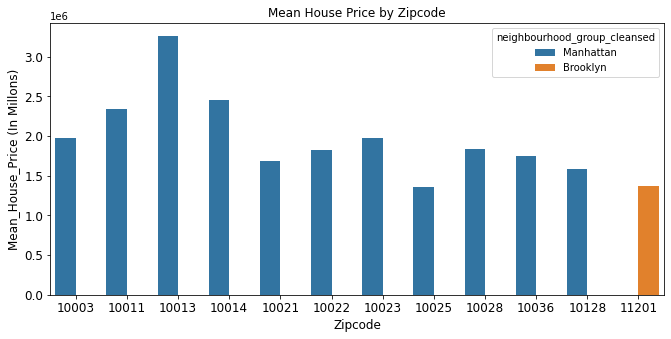

In [38]:
merged_airb_zill.sort_values('zipcode', inplace = True)
plt.figure(figsize= (11,5))
sns.barplot(x="zipcode", y="Mean_House_Price",hue='neighbourhood_group_cleansed' ,data=merged_airb_zill)
plt.xticks(size=12)
plt.xlabel('Zipcode', size=12)
plt.yticks(size=12)
plt.title('Mean House Price by Zipcode')
plt.ylabel('Mean_House_Price (In Millons)',size=12);

It can be observed that most of the zipcodes belong to Manhattan neighbourhood. And zipcode 10025 has the lowest Mean House Price, around 1.36M USD while zipcode 10013 has the highest mean house price, around 3.26M USD

Next, we will be plotting the annual revenue by zipcode. We will also color the plot by respective neighbourhood group.

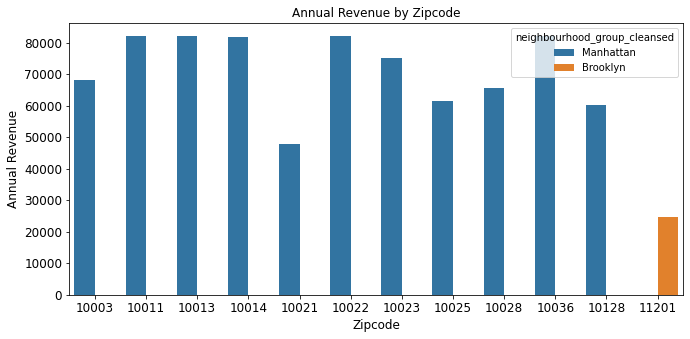

In [39]:
plt.figure(figsize= (11,5))
sns.barplot(x="zipcode", y="annual_revenue",hue='neighbourhood_group_cleansed' ,data=merged_airb_zill)
plt.xticks(size=12)
plt.xlabel('Zipcode', size=12)
plt.yticks(size=12)
plt.title('Annual Revenue by Zipcode')
plt.ylabel('Annual Revenue',size=12);

It can be observed that zipcode 11201 in Brooklyn generates the the lowest annual revenue, around 24K USD while zipcode 10011,10013,10036 generate the highest annual revenue, around 82K USD

Next, we will be plotting the break even period by zipcode.

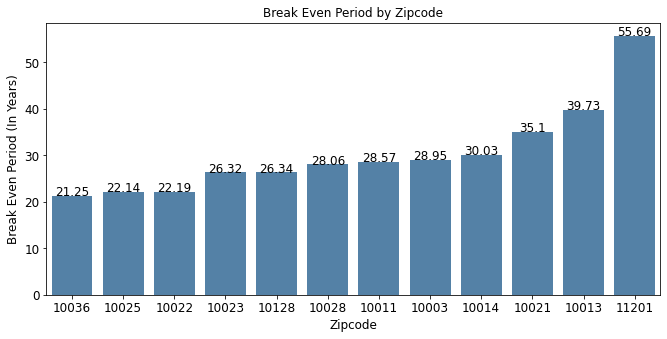

In [40]:
plt.figure(figsize= (11,5))
sns.barplot(x="zipcode", y="break_even_period", data=merged_airb_zill, color='steelblue', order=merged_airb_zill.sort_values('break_even_period').zipcode)
plt.xticks(size=12)
plt.xlabel('Zipcode', size=12)
plt.yticks(size=12)
plt.title('Break Even Period by Zipcode')
plt.ylabel('Break Even Period (In Years)',size=12)

for index, value in enumerate(round(merged_airb_zill.sort_values('break_even_period')['break_even_period'],2)):
    plt.text(index,round(value,2), str(round(value,2)), color='black', ha="center", fontsize = 'large');

It can be observed that zipcode 10036 has the shortest break even period of 21.25 years followed by 10025 and then 10022.

## 7. Recommendations and Next Steps

### Recommendations

The problem statement required to identify the zip codes that would be most profitable on short term rentals within New York City. We will recommend the top 5 zip codes with small break even periods to the real-estate firm.         
Top 5 zipcodes are:          
**10036, 10025, 10022, 10023, 10128**            

If the real-estate is focussing on investing in properties with lowest break-even period, then they should buy properties in zipcode **10036** which is in Manhattan. 

In [41]:
merged_airb_zill.sort_values('Rank', inplace = True)
merged_airb_zill.head()

,zipcode,Mean_House_Price,neighbourhood_group_cleansed,median_price,annual_revenue,break_even_period,Rank
9,10036,1745469.23,Manhattan,300.0,82125.000,21.25,1.0
7,10025,1363930.77,Manhattan,225.0,61593.750,22.14,2.0
5,10022,1819284.62,Manhattan,299.5,81988.125,22.19,3.0
6,10023,1981453.85,Manhattan,275.0,75281.250,26.32,4.0
10,10128,1586423.08,Manhattan,220.0,60225.000,26.34,5.0


### Next Steps

- The occupancy rate is assumed to be 75%. Various variables relating to availability, reviews, and ratings could have been used to derive the occupancy rate. Various other description variables could have been used to extract useful information which would have helped in deriving a more accurate occupancy rate.

- Due to time constraints - identifying seasonality patterns among the listings in different zip codes was ignored. Availability changes from holiday seasons to other seasons. This would be crucial in analyzing occupancy trends.

- We utilized daily price for calculating revenue and other variables due to the large number of missing values in other types of prices. We could have utlized external resources to fetch weekly, monthly, annual prices of listings.This would have helped in better decision making